In [38]:
import numpy as np
import math
import random
import tqdm
import matplotlib.pyplot as plt
import scipy.special as sp

In [32]:
def ndim_distance(a,b):
    """subtracted = []
    result = 0
    for i in range(len(a)):
        subtracted.append(a[i]-b[i])
    for i in subtracted:
        result += i*i
    result = math.sqrt(result)
    return result"""
    return math.sqrt(np.sum((a-b)**2))

In [33]:
np.array([1,2,3,4])**2

array([ 1,  4,  9, 16])

In [34]:
def get_average_distances(points):
    distances = 0
    for point in points:
        for point2 in points:
            distances += ndim_distance(point, point2)
    distances /= len(points)
    return distances

In [35]:
def get_distances_randomized(samples, dimentions):
    points = np.random.rand(samples, dimentions)
    return get_average_distances(points)

In [36]:
samples = 50
max_dims = 500
distances = []
for i in tqdm.trange(1, max_dims):
    distances.append(get_distances_randomized(samples, i))


  4%|▍         | 20/499 [00:01<00:34, 13.85it/s]

100%|██████████| 499/499 [00:22<00:00, 21.81it/s]


[15.436577646599087, 26.1216796699707, 31.84374327296897, 38.981110016562624, 43.63854696282319, 47.49923621377583, 53.454887828014556, 57.604189002555025, 59.14337968061944, 61.81895554016237, 63.99050487252647, 67.66169813905975, 69.08943247459791, 74.98189938750666, 76.09932031265083, 80.70650554146418, 83.95972474284426, 84.85284987598483, 84.9096794462927, 87.66472981089804, 89.42759900478333, 93.44258985755886, 95.6550047899288, 96.29595830158232, 97.17913222398836, 101.1532144028137, 102.93267800149533, 105.37193368274046, 106.82824063004468, 109.74300959588138, 108.6946309895643, 112.04017900515932, 114.40624917451011, 118.22034483850922, 117.75398657543889, 117.93535813584009, 121.43472112478663, 123.18615672258537, 126.70722730219764, 127.26437408047076, 127.09287122703269, 131.02845484994754, 130.924046544522, 132.12847596237168, 133.08357833792138, 135.8548502476453, 136.78544747227707, 138.6456166254107, 140.05460936149012, 143.79461658955324, 142.79261953249323, 143.79120

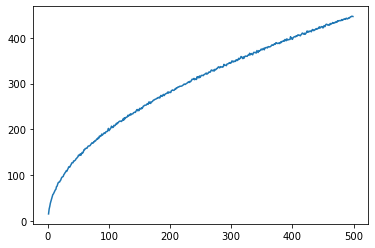

In [37]:
print(distances)
plt.plot(range(1, max_dims), distances)

In [40]:
def hypersphere_volume(r, d):
    return ((np.pi**(d/2))/(sp.gamma((d/2)+1)))*(r**d)
def hypersphere_sa(r, d):
    return ((2*np.pi**(d/2))/(sp.gamma(d/2)))*(r**(d-1))

In [41]:
print(hypersphere_volume(1, 2)-np.pi)


0.0


In [44]:
max_dims = 50
volumes = []
areas = []
for i in tqdm.trange(1, max_dims+1):
    volumes.append(hypersphere_volume(1, i))
    areas.append(hypersphere_sa(1, i))

100%|██████████| 50/50 [00:00<00:00, 20582.51it/s]


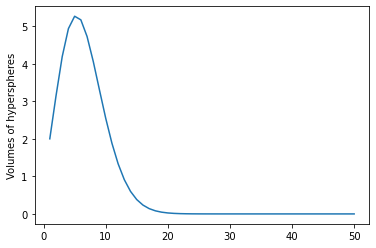

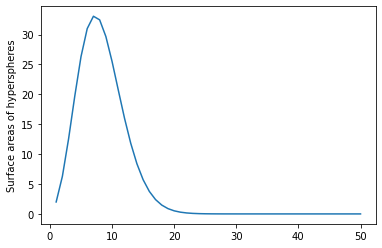

In [45]:
plt.plot(range(1, max_dims+1), volumes)
plt.ylabel("Volumes of hyperspheres")
plt.show()
plt.plot(range(1,max_dims+1), areas)
plt.ylabel("Surface areas of hyperspheres")
plt.show()